In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

In [2]:
DATA_PATH = "../Data/뜸부기/"

In [3]:
train_data = pd.read_csv(DATA_PATH + 'train.csv')
train_data

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [4]:
test_data = pd.read_csv(DATA_PATH + 'test.csv')
test_data.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [6]:
train_data['제조사'].value_counts()

제조사
H사    1237
B사    1169
K사    1164
A사    1142
T사    1109
P사    1071
V사     605
Name: count, dtype: int64

In [7]:
train_data['모델'][train_data['제조사'] == 'H사'].value_counts()

모델
ION6     379
KNE      365
ION5     353
IONIQ    140
Name: count, dtype: int64

In [8]:
train_data['차량상태'].value_counts()

차량상태
Brand New     3380
Nearly New    2059
Pre-Owned     2058
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

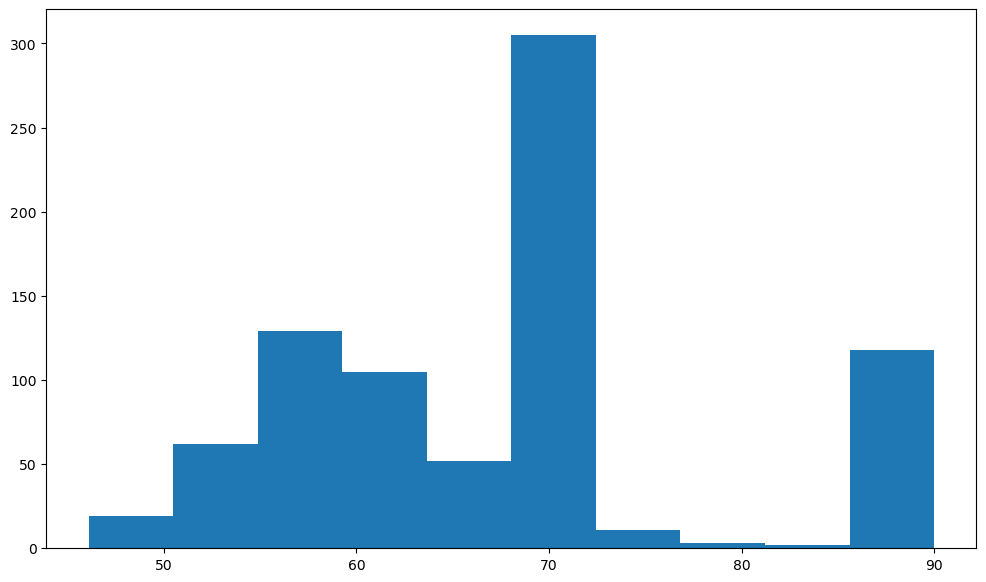

In [9]:
plt.figure(figsize = (12, 7))
plt.hist(train_data['배터리용량'][train_data['제조사'] == 'H사'])
plt.show

In [10]:
train_data['배터리용량'][train_data['제조사'] == 'H사'].mean()

67.39844044665013

In [11]:
train_data['배터리용량'] = train_data['배터리용량'].fillna(train_data.groupby('제조사')['배터리용량'].transform('mean'))

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     7497 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [13]:
pre_train_data = pd.get_dummies(train_data, columns = ['제조사', '모델', '차량상태', '구동방식', '사고이력'], drop_first = True)
pre_train_data

,ID,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원),제조사_B사,제조사_H사,제조사_K사,제조사_P사,...,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes
0,TRAIN_0000,86.077000,13642,0,2,159.66,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
1,TRAIN_0001,56.000000,10199,6,0,28.01,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,TRAIN_0002,91.200000,2361,7,0,66.27,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,TRAIN_0003,78.775598,21683,3,0,99.16,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,TRAIN_0004,61.018000,178205,1,0,62.02,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,67.398440,3773,10,0,35.95,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7493,TRAIN_7493,46.000000,135411,2,0,23.40,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
7494,TRAIN_7494,75.265280,1363,2,0,120.00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7495,TRAIN_7495,56.000000,39445,6,2,24.00,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [14]:
train_target = pre_train_data['가격(백만원)']

train_feature_col = pre_train_data.columns.to_list()
train_feature_col.remove('가격(백만원)')
train_feature_col.remove('ID')

train_feature = pre_train_data[train_feature_col]

train_feature

,배터리용량,주행거리(km),보증기간(년),연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,제조사_V사,...,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes
0,86.077000,13642,0,2,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
1,56.000000,10199,6,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,91.200000,2361,7,0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,78.775598,21683,3,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,61.018000,178205,1,0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,67.398440,3773,10,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7493,46.000000,135411,2,0,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
7494,75.265280,1363,2,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7495,56.000000,39445,6,2,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [15]:
pre_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7497 non-null   object 
 1   배터리용량            7497 non-null   float64
 2   주행거리(km)         7497 non-null   int64  
 3   보증기간(년)          7497 non-null   int64  
 4   연식(년)            7497 non-null   int64  
 5   가격(백만원)          7497 non-null   float64
 6   제조사_B사           7497 non-null   bool   
 7   제조사_H사           7497 non-null   bool   
 8   제조사_K사           7497 non-null   bool   
 9   제조사_P사           7497 non-null   bool   
 10  제조사_T사           7497 non-null   bool   
 11  제조사_V사           7497 non-null   bool   
 12  모델_ID4           7497 non-null   bool   
 13  모델_ION5          7497 non-null   bool   
 14  모델_ION6          7497 non-null   bool   
 15  모델_IONIQ         7497 non-null   bool   
 16  모델_KNE           7497 non-null   bool   
 17  모델_M3         

In [16]:
scaling_target = pre_train_data.columns[1:5]
scaling_target

Index(['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'], dtype='object')

In [17]:
test_feature_col = pre_test_data.columns.to_list()
test_feature_col.remove('ID')

test_feature = pre_test_data[train_feature_col]

test_feature

NameError: name 'pre_test_data' is not defined

In [53]:
for col in scaling_target:
    rb_scaler = RobustScaler()
    rb_scaler.fit(train_feature[col].values.reshape(-1, 1))
    train_feature[col] = rb_scaler.transform(train_feature[col].values.reshape(-1, 1))
    test_feature[col] = rb_scaler.transform(test_feature[col].values.reshape(-1, 1))

C:\Users\DAEG\AppData\Local\Temp\ipykernel_18424\3171256708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature[col] = rb_scaler.transform(train_feature[col].values.reshape(-1, 1))
C:\Users\DAEG\AppData\Local\Temp\ipykernel_18424\3171256708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feature[col] = rb_scaler.transform(test_feature[col].values.reshape(-1, 1))
C:\Users\DAEG\AppData\Local\Temp\ipykernel_18424\3171256708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [55]:
train_feature

,배터리용량,주행거리(km),보증기간(년),연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,제조사_V사,...,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes
0,0.946525,-0.066127,-0.833333,2.0,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
1,-0.577609,-0.127843,0.166667,0.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,1.206130,-0.268342,0.333333,0.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.576531,0.078011,-0.333333,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.323325,2.883718,-0.666667,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.000000,-0.243032,0.833333,0.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7493,-1.084353,2.116622,-0.500000,0.0,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
7494,0.398647,-0.286232,-0.500000,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7495,-0.577609,0.396401,0.166667,2.0,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [59]:
rf_model = RandomForestRegressor(random_state = 7, oob_score = True)

params = {
    'n_estimators' : [50, 100, 200, 300, 500],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10, 15, 20],
    'min_samples_leaf' : [1, 2, 4, 8, 16],
    'max_features' : ['auto', 'sqrt', 'log2', None],
    'criterion' : ['squared_error', 'absolute_error']
}

In [60]:
searchCV = RandomizedSearchCV(rf_model,
                            param_distributions = params,
                            n_iter = 100,
                            cv = 3,
                            verbose = 4)

In [61]:
searchCV.fit(train_feature, train_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.998 total time=   1.0s
[CV 2/3] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.998 total time=   0.8s
[CV 3/3] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.998 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.986 total time=   1.1s
[CV 2/3] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=0.985 total time=   1.1s
[CV 3/3] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimat

c:\Users\DAEG\anaconda3\envs\Project_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DAEG\anaconda3\envs\Project_38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DAEG\anaconda3\envs\Project_38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\DAEG\anaconda3\envs\Project_38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=7),
                   n_iter=100,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   verbose=4)

In [62]:
searchCV.best_params_

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'criterion': 'squared_error'}

In [63]:
best_rf_model = searchCV.best_estimator_
train_score = best_rf_model.score(train_feature, train_target)
print(f"train_score : {train_score}")

train_score : 0.9991173828454945


In [64]:
train_pred = best_rf_model.predict(train_feature)
train_mse_loss = mean_squared_error(train_target, train_pred)

train_mse_loss

1.1851834602475333

In [65]:
test_data['배터리용량'] = test_data['배터리용량'].fillna(train_data.groupby('제조사')['배터리용량'].transform('mean'))

In [66]:
pre_test_data = pd.get_dummies(test_data, columns = ['제조사', '모델', '차량상태', '구동방식', '사고이력'], drop_first = True)
pre_test_data

,ID,배터리용량,주행거리(km),보증기간(년),연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,...,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes
0,TEST_000,76.093000,14057,2,0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,TEST_001,90.000000,7547,8,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,TEST_002,78.775598,7197,7,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
3,TEST_003,68.479000,10357,7,1,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,TEST_004,62.344547,7597,10,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,64.683000,117298,2,0,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
842,TEST_842,55.547000,72308,0,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
843,TEST_843,55.547000,124537,0,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
844,TEST_844,69.646000,15629,4,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [67]:
test_pred = best_rf_model.predict(test_feature)

In [68]:
submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')
submission['가격(백만원)'] = test_pred

submission

,ID,가격(백만원)
0,TEST_000,130.759588
1,TEST_001,80.182145
2,TEST_002,64.641135
3,TEST_003,34.578721
4,TEST_004,44.396793
...,...,...
841,TEST_841,151.218131
842,TEST_842,38.707270
843,TEST_843,38.726319
844,TEST_844,58.758863


In [69]:
submission.to_csv(DATA_PATH + 'sample_submission.csv', index = False)